<a href="https://colab.research.google.com/github/ANUPRIYAR/ML_Practise/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv

--2020-12-24 04:09:36--  https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2020-12-24 04:09:36 (58.8 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [5]:
X = data.iloc[:,[3,4]].values

# **Using the elbow method to find the optimal number of clusters**

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)

In [8]:
model = dbscan.fit(X)
labels = model.labels_

In [9]:
from sklearn import metrics

In [10]:
# Identifying the points which makes up oour core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True

# Calculating the number of clusters 
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

9

In [11]:
metrics.silhouette_score(X, labels)

-0.1908319132560097

In [12]:
y_pred = dbscan.fit_predict(X)

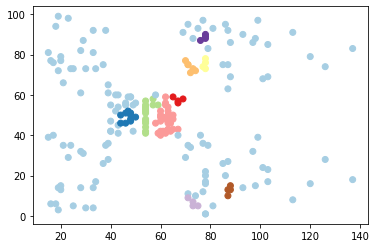

In [13]:
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='Paired')

In [15]:
# Applying Standard Scalar 
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [26]:
dbscan = DBSCAN(eps=.3,min_samples=5)
dbscan.fit(scaled_X)
y_pred = dbscan.fit_predict(scaled_X)

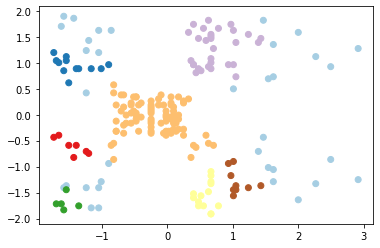

In [28]:
plt.scatter(scaled_X[:,0], scaled_X[:,1],c=y_pred, cmap='Paired');

# **Kmeans Clustering**

In [32]:
from sklearn.cluster import KMeans

# Elbow Method
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(scaled_X)
  wcss.append(kmeans.inertia_)



In [33]:
kmeans.inertia_

29.316377372329583

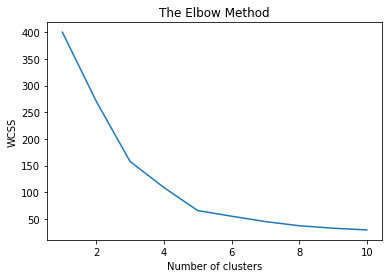

In [35]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [37]:
# Fitting K means to the dataset 

kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(scaled_X)
ypred = kmeans.fit_predict(scaled_X)

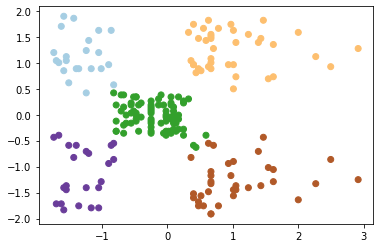

In [38]:
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=ypred, cmap='Paired')

# **Hierarchical Clustering**

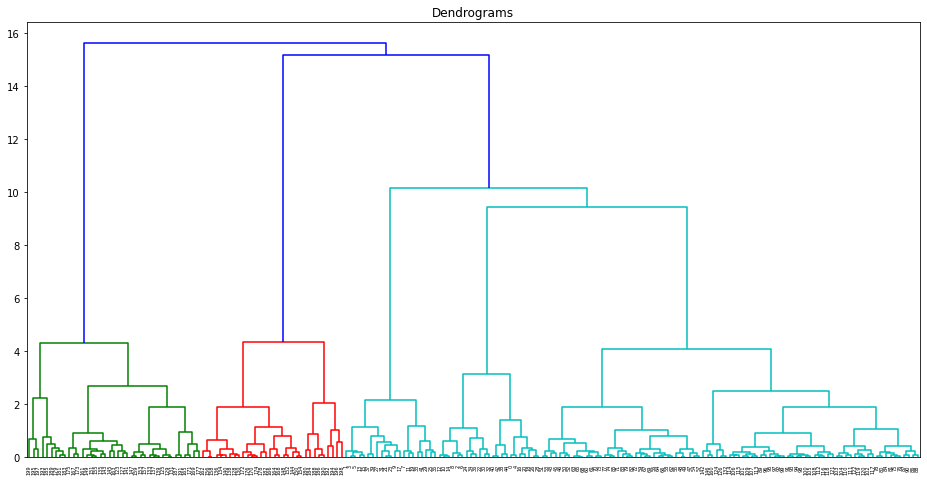

In [42]:
# Scaling of data 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16,8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

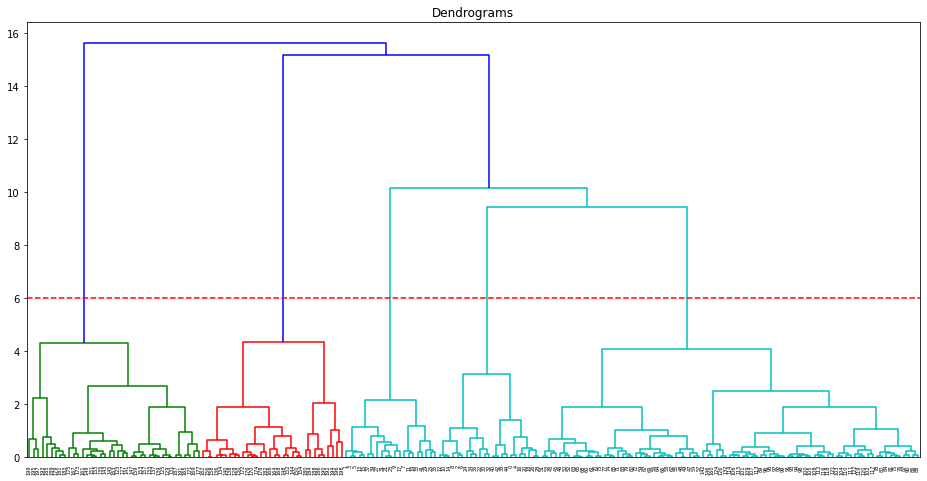

In [44]:
plt.figure(figsize=(16,8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--');

In [58]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
agg.fit(scaled_X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [59]:
pred = agg.fit_predict(scaled_X)

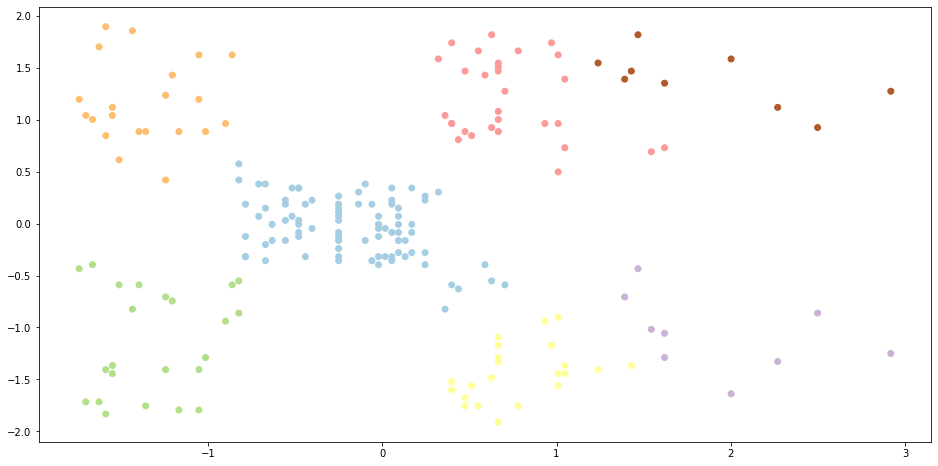

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=pred, cmap='Paired')